# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Download the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 6s 0us/step


Selected idexes for two classes (aircraft = 0, ship = 8)

In [4]:
index_train = np.where((y_train == 0) | (y_train == 8))
index_test = np.where((y_test == 0) | (y_test == 8))

We will extract the two desired classes by their indexes

In [5]:
x_train = x_train[index_train[0],:]
y_train = y_train[index_train[0]]
x_test = x_test[index_test[0],:]
y_test = y_test[index_test[0]]

Change all labels from 8 to 1 (aircraft = 0, ship = 1)

In [6]:
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

The current shape of the data set:

In [7]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_testn: {y_test.shape}')

x_train: (10000, 32, 32, 3)
y_train: (10000, 1)
x_test: (2000, 32, 32, 3)
y_testn: (2000, 1)


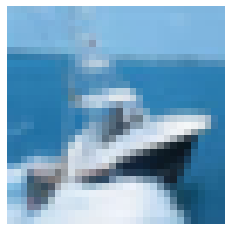

1

In [8]:
import matplotlib
plt.imshow(x_train[0], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[0][0]

### Preprocessing the Training set

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow(x=x_train, y=y_train, batch_size = 32)

### Preprocessing the Test set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow(x=x_test, y=y_test, batch_size = 32)

## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

### Step 2 - Pooling

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Fully Connected layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

## Part 3 - Training the CNN

### Compiling the CNN

In [19]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [20]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
313/313 [==============================] - 16s 19ms/step - loss: 0.5532 - accuracy: 0.7089 - val_loss: 0.4165 - val_accuracy: 0.8195
Epoch 2/10
313/313 [==============================] - 6s 19ms/step - loss: 0.4133 - accuracy: 0.8145 - val_loss: 0.3904 - val_accuracy: 0.8285
Epoch 3/10
313/313 [==============================] - 6s 18ms/step - loss: 0.3634 - accuracy: 0.8412 - val_loss: 0.3501 - val_accuracy: 0.8470
Epoch 4/10
313/313 [==============================] - 6s 18ms/step - loss: 0.3365 - accuracy: 0.8552 - val_loss: 0.3189 - val_accuracy: 0.8680
Epoch 5/10
313/313 [==============================] - 6s 18ms/step - loss: 0.3035 - accuracy: 0.8693 - val_loss: 0.2709 - val_accuracy: 0.8895
Epoch 6/10
313/313 [==============================] - 6s 19ms/step - loss: 0.2821 - accuracy: 0.8831 - val_loss: 0.2547 - val_accuracy: 0.9060
Epoch 7/10
313/313 [==============================] - 6s 19ms/step - loss: 0.2648 - accuracy: 0.8917 - val_loss: 0.2542 - val_accuracy: 0.895

## Part 4 - Making a single prediction

## Visualization Loss and Accuracy


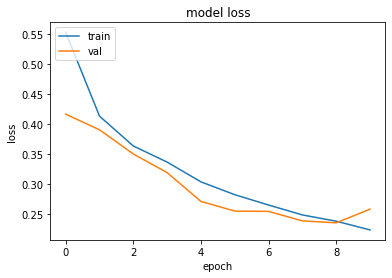

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

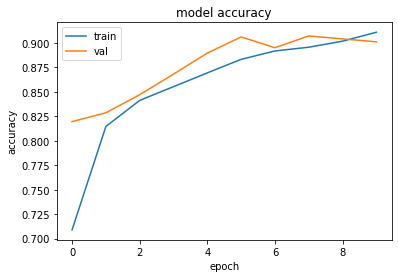

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()